In [91]:
import numpy as np

E = np.genfromtxt('edata.txt', delimiter=',')
m = np.genfromtxt('magdata.txt', delimiter=',')
t = np.genfromtxt('tdata.txt', delimiter=',')


Magnetisation:
[-0.8648144 -0.8642016 -0.8634424 -0.862818  -0.8620748 -0.860252
 -0.8569464 -0.8518912 -0.8490056 -0.8451448 -0.8435396 -0.8341276
 -0.8044432 -0.7550432 -0.6829436 -0.6161236 -0.4219948 -0.3956648
 -0.2360528 -0.2083388 -0.1650912 -0.1548436 -0.1287432 -0.1250164
 -0.0949964 -0.0901656 -0.0911204 -0.0713008 -0.0722772 -0.0672752]
[0.02800008 0.02803106 0.02798503 0.02798132 0.02797823 0.02798985
 0.02805268 0.0281006  0.0282939  0.0288531  0.02988278 0.036419
 0.03614443 0.04486066 0.06404479 0.09311358 0.18373782 0.1191931
 0.11970429 0.09165998 0.08357332 0.08589327 0.07434774 0.0670555
 0.06265045 0.05687879 0.0560092  0.05094791 0.0487787  0.04721384]

Energy:
[0.1695796 0.1693282 0.1699416 0.1704184 0.1711546 0.1726502 0.1762504
 0.1810668 0.184845  0.1872462 0.1855316 0.190028  0.2072118 0.2357668
 0.2645428 0.273746  0.3058846 0.3339758 0.3840358 0.4033864 0.4268606
 0.4341124 0.4620666 0.4726822 0.5033086 0.5086448 0.5202196 0.5433506
 0.546717  0.5583334]
[0

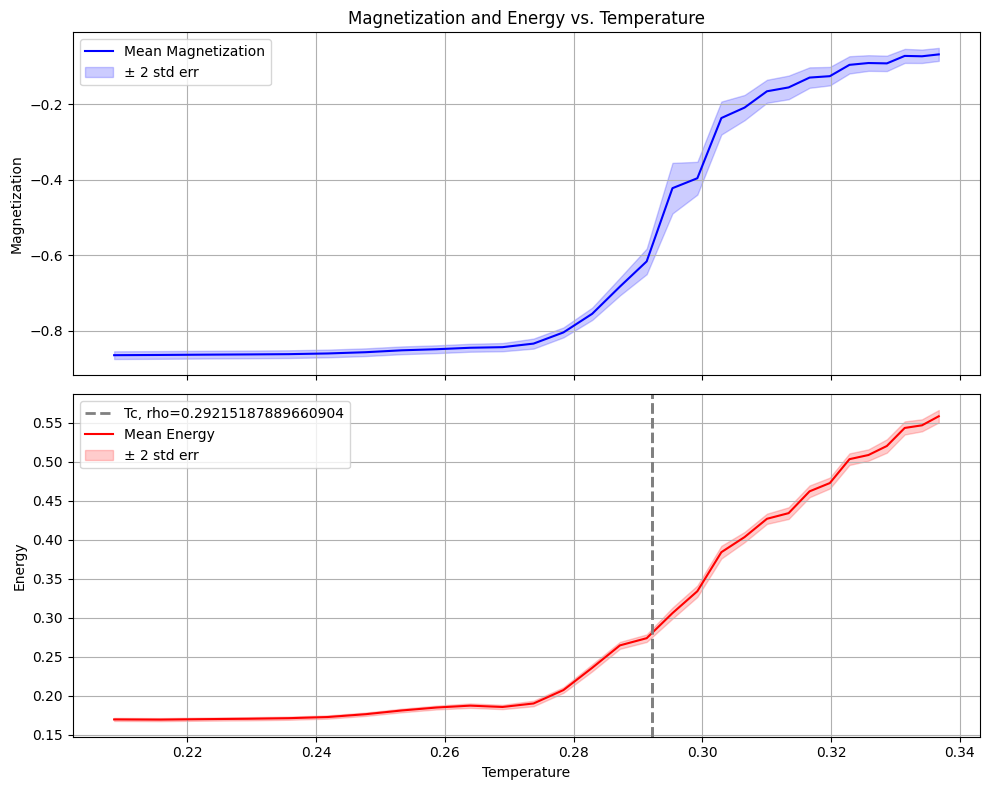

In [103]:
print(f'''
Magnetisation:
{m.mean(axis=1)}
{m.std(axis=1)}

Energy:
{E.mean(axis=1)}
{E.std(axis=1)}

Temperature:
{t}
''')

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import math

# --- Replace these placeholders with your actual data ---
# Ensure these are NumPy arrays for the calculations to work

rho = 1.0/(np.exp(2.0/t)+1)
m_mean = m.mean(axis=1)
m_std =  m.std(axis=1)/pow(m.shape[0],0.5)
E_mean = E.mean(axis=1)
E_std = E.std(axis=1)/pow(E.shape[0],0.5)

# --------------------------------------------------------

# Create a figure with two subplots, one on top of the other
# 'sharex=True' links the x-axis for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Plot 1: Magnetization vs. Temperature ---
ax1.plot(rho, m_mean, label='Mean Magnetization', color='blue')
ax1.fill_between(rho, m_mean - 2*m_std, m_mean + 2*m_std, 
                 color='blue', alpha=0.2, label='± 2 std err')
ax1.set_ylabel('Magnetization')
ax1.set_title('Magnetization and Energy vs. Temperature')
ax1.legend()
ax1.grid(True)
ax2.axvline(x=1/(math.exp(2/2.26)+1), color='gray', linestyle='--', linewidth=2, label=f'Tc, rho={1/(math.exp(2/2.26)+1)}')


# --- Plot 2: Energy vs. Temperature ---
ax2.plot(rho, E_mean, label='Mean Energy', color='red')
ax2.fill_between(rho, E_mean - 2*E_std, E_mean + 2*E_std, 
                 color='red', alpha=0.2, label='± 2 std err')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True)

ax2.axvline(x=1/(math.exp(2/2.26)+1), color='gray', linestyle='--', linewidth=2, label=f'Tc, rho={1/(math.exp(2/2.26)+1)}')
print(2/math.log(3))

# Show the plot
plt.tight_layout()
plt.show()



IndexError: index 1 is out of bounds for axis 0 with size 1

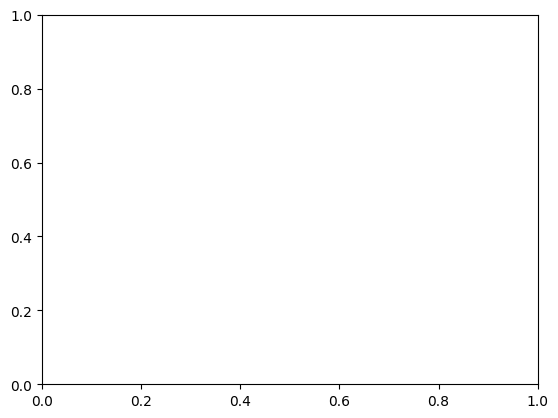

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

#for i in range(len(t)):
#    plot_acf(E[i], lags=1000, title=f'ACF E, T={t[i]}') 

import pandas as pd



for i in range(len(t)):


    df = pd.DataFrame({'original':m[i]})

    df['low_freq_noise'] = df['original'].rolling(window=1000, center=True).mean()

    df['small_noise'] = df['original'] - df['low_freq_noise']

    fig = plot_acf(df['small_noise'].dropna(), lags=100, title=f'ACF m, T={t[i]}') 
    ax = fig.gca()
    ax.set_yscale('log')

    ax.set_ylim(bottom=0.01) 

    plt.show()

0